# AirPassengers 데이터셋을 활용한 시계열 분석

\
목표)
1. ARIMA를 통해 시계열 예측을 수행
2. ARCH를 통해 S&P500의 변동성을 모델링
___
평가 지표)
1. AirPassengers 데이터셋을 통해 전처리 과정을 체계적으로 진행
2. AutoARIMA의 적용 및 결과 확인
3. ARCH 모델이 제대로 작동하는 지 확인하고 결과 분석

① 데이터 연결하기\
② ARIMA 실습해보기\
③ 데이터 확인하기\
④ 분산을 일정하게 만들기 - log transformation\
⑤ 차분을 통해 분석하기\
⑥ Auto ARIMA 적용 및 결과 확인\
⑦ ARCH 모델 실습해보기

## 1. 데이터셋

 먼저 데이터가 저장된 폴더를 연결한다.

>!mkdir -p aiffel/time_series_basic \
>!cp data/AirPassengers.csv aiffel/time_series_basic/

arch 모델을 실습을 위해 설치를 진행해준다.
>!pip install arch


*클라우드에는 이미 설치가 되어있기 때문에 코드로 돌리지는 않았다.*

### (1) 데이터 불러오기

In [1]:
# 라이브러리 및 모듈 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA 
import pmdarima as pm # Auto ARIMA 모델

In [2]:
# 데이터 불러오기
ap = pd.read_csv('/aiffel/aiffel/time_series_basic/AirPassengers.csv')
ap

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [3]:
ap.drop('Month', axis = 1, inplace = True)
ap

#Passengers
0            112
1            118
2            132
3            129
4            121
..           ...
139          606
140          508
141          461
142          390
143          432

[144 rows x 1 columns]

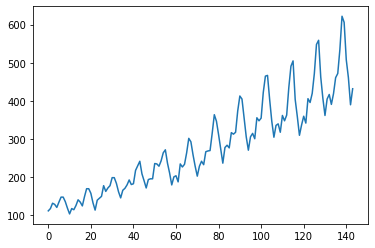

In [4]:
plt.plot(ap)
plt.show()

출력된 데이터를 보면 추세를 보이고 있고, 분산이 증가하고 있기 때문에 정상성을 부여하기 위해 분산과 평균을 일정하게 만드는 작업을 진행한다.

In [5]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)
ap_transformed

#Passengers
0       4.718499
1       4.770685
2       4.882802
3       4.859812
4       4.795791
..           ...
139     6.406880
140     6.230481
141     6.133398
142     5.966147
143     6.068426

[144 rows x 1 columns]

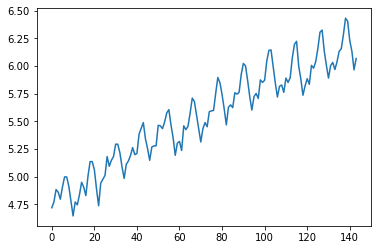

In [6]:
plt.plot(ap_transformed)
plt.show()

데이터의 크기가 크게 줄어든 것을 확인할 수 있고, 분산이 일정하게 바뀐 것도 확인 할 수 있다.

[]

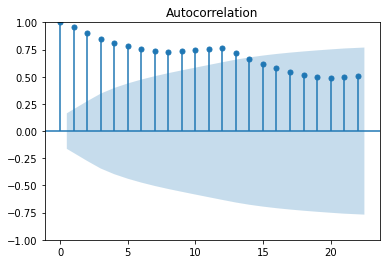

In [7]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot()

**ACF 검정 결과에 대한 해석**

ACF(Auto-Correlation Function) 함수 결과에서 임계치가 점점 커지는 형태로 그래프가 그려지는 이유는 다음과 같다.

ACF 함수는 시계열 데이터의 자기상관성을 측정하는 함수로, 시차(lag)에 따른 자기상관계수를 계산하여 그래프로 나타낸다. 자기상관계수는 -1에서 1사이의 값을 가지며, 시계열 데이터가 완전히 무작위인 경우에는 0 근처의 값이 나타난다.

따라서 ACF 그래프에서 임계치는 시계열 데이터가 완전히 무작위인 경우에 대한 기준이 되는데,  이 임계치 이상의 값을 가지는 경우에는 시계열 데이터가 무작위보다 높은 자기상관성을 가진다는 것을 의미한다. 이러한 경우에는 시계열 데이터의 패턴이 뚜렷하게 나타나는 것으로 해석할 수 있다.

그러나, 시계열 데이터가 정상성을 가지지 않거나 추세나 계절성 등의 패턴을 가지는 경우에는 ACF 그래프에서 임계치를 넘는 값이 나타날 수 있다. 이러한 경우에는 데이터의 정상성을 확인하고 다른 방법을 사용하여 자기상관성을 측정해야 한다.

따라서 ACF 그래프에서 임계치가 점점 커지는 형태로 그려지는 것은, 시계열 데이터의 자기상관계수가 무작위보다 높은 값을 가지는 경우가 점점 적어지기 때문이다. 이는 시계열 데이터의 패턴이 뚜렷하게 나타나는 것으로 해석할 수 있다.

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

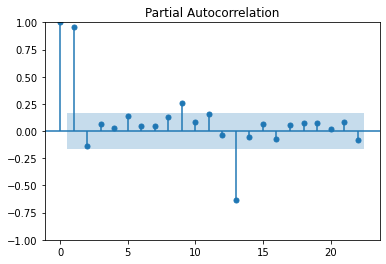

In [8]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot()

___
**이번엔 차분을 통해 평균을 일정하게 만들어, 증가 추세를 제거한다.**

In [9]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

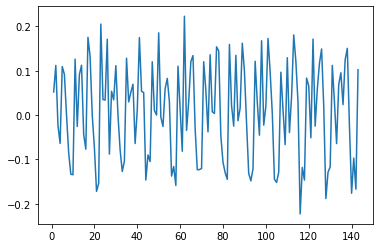

In [10]:
plt.plot(ap_diff)
plt.show()

평균이 일정하게 된 것을 확인할 수 있다. 그런데 아직 일정한 패턴이 보이는 것 같다. 아직 주기성을 가진 것 같으니 확인 후 처리를 하도록 한다.

[]

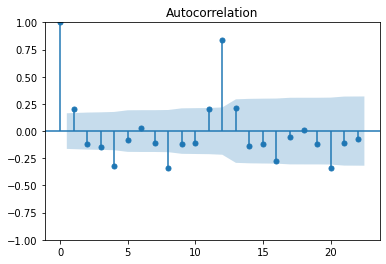

In [11]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff)
plt.plot()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

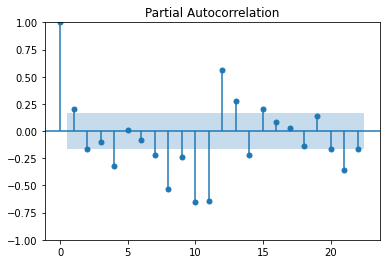

In [12]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_diff)
plt.plot()

둘 다 12에서 유의미한 정보를 보이는 것을 보니 계절성이 나타나는 것으로 생각할 수 있다.
따라서 반드시 유의미하다고 할 수는 없으나 auto arima가 계절성을 고려하도록 해주어야 한다. 
___

### AutoARIMA

In [13]:
ap_transformed

#Passengers
0       4.718499
1       4.770685
2       4.882802
3       4.859812
4       4.795791
..           ...
139     6.406880
140     6.230481
141     6.133398
142     5.966147
143     6.068426

[144 rows x 1 columns]

In [14]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

데이터셋을 분리 할 때 랜덤이 아닌 80% 기준으로 분리를 시키는데, 이는 시간이 순서가 중요한 의미를 가진 시계열 데이터이기 때문이다.

In [15]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12, D=12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-196.569, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 3.791 seconds


모델 값이 (0,1,2)가 가장 적합하다고 나온다.
___
AutoARIMA의 파라미터
- seasonal : False인 경우 non-seasonal model로 제한-
- suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줌
- trace : True일 때 오류(error)가 발생하면 일부 내용을 출력
- max_D : seasonal의 최대 값을 설정

In [16]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'numpy.ndarray'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
[6.18010083 6.14616332 6.15817888 6.17019443 6.18220998 6.19422554
 6.20624109 6.21825665 6.2302722  6.24228775 6.25430331 6.26631886
 6.27833442 6.29034997 6.30236553 6.31438108 6.32639663 6.33841219
 6.35042774 6.3624433  6.37445885 6.3864744  6.39848996 6.41050551
 6.42252107 6.43453662 6.44655218 6.45856773 6.47058328]
--------------------------------------------------------------------------------
[[5.98736259 6.37283907]
 [5.85107277 6.44125387]
 [5.82729445 6.48906331]
 [5.807027   6.53336186]
 [5.78940386 6.57501611]
 [5.77386531 6.61458577]
 [5.760025   6.65245718]
 [5.74760298 6.68891031]
 [5.73638867 6.72415573]
 [5.72621895 6.75835656]
 [5.71696441 6.7916422 ]
 [5.70852037 6.82411736]
 [5.70080067 6.85586817]
 [5.69373342 6.88696652]
 [5.68725791 6.91747314]
 [5.681322

이제 예측 성능을 시각화 해보자

- train과 test data를 축(axis)으로 만들었다.
-  x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화
-  1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성
-  원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성
-  2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냄

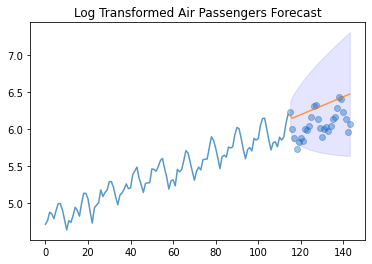

In [17]:
# 예측 성능을 시각화

x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # plot을 그리기 위해 x축을 생성

plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) 
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화

해당 그래프에서 나타나는 주황색 선이 arima (0,1,2)모델이 추정한 선이다.
추세를 잘 반영하고 있다고 볼 수 있고, 구간 추정 또한 신뢰구간 안에 대부분의 데이터가 들어있는 것을 시각적으로 확인할 수 있다.
____

### ARCH 모델 실습

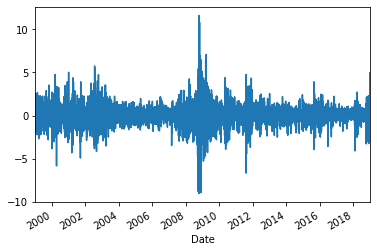

In [18]:
# 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리.
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러오기

# 필요한 데이터로 가공하고 시각화를 통해 확인
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 
plt.show()

조건성 이분산성(conditional heteroskedasticity)이 나타남

In [22]:
# ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res_am = am.fit(update_freq=5)

# 지표를 통한 결과 확인
print(res_am.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Apr 19 2023   Df Residuals:                     5029
Time:         

- AIC, BIC는 낮을 수록 적합도가 높은 것을 의미한다.
- Mean Model보다 Volatility Model값을 집중적으로 확인하도록 한다.
- 위 결과를 통해 신뢰구간 95에서 garch(1,1)의 각 파라미터들이 유의미하다는 것을 알 수 있다.

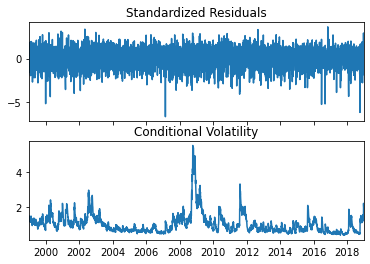

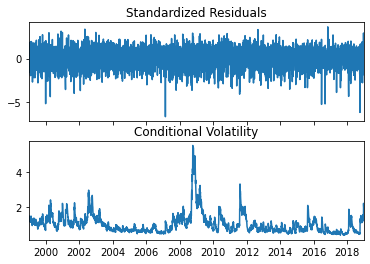

In [21]:
# 시각화를 통한 결과값 확인
res_am.plot()

residual들이 뚜렷한 조건부 이분산성을 보여주지 않고, 비교적 모델적합이 잘 되었다는 것을 확인할 수 있다.

## 회고

시계열을 배우는 한 주는 다른 때보다 힘들었던 것 같다. 시계열 데이터를 이해하기 위해 알아야 하는 수학적 지식들이 꽤 많았고, 그를 최대한 배제하고 시계열 데이터를 이해하려고 하는게 조금 어려웠던 것 같다.
시계열을 배우면서 알게된 것 중 기억에 남는 것은 우리가 시각화에 너무 의존하면 안된 다는 것이었다. 허구 상관의 개념을 배우면서 내가 잘 모르는 분야에서는 기계적으로 데이터를 처리하고 시각화해서 그에 대해 어떤 결론을 내려보게 되는데, 
시각화에만 의존하여 잘못된 결론을 내리는 경우가 있을 수 있다는 걸 알게되어 뭔가 머리를 틱 맞은 기분이었다.
데이터를 파악할 때 더 깊고 자세하게 보고 생각해야 하는구나를 알게되어 좋았다.

다만.. 이번에 프로젝트 노드가 많아서 조금 버겁다..ㅎㅎ
그래도 프로젝트를 하면서 내가 어디에 조금 더 재미를 느끼고, 반대로 잘 맞지 않는지 알 수 있어서 좋은 것같다.(시계열은 안타깝게도 잘 못하는 것 같다. 좀 더 노력해보자..)

## Reference

- 단위근 (https://data-newbie.tistory.com/38)
- ACF, PACF (https://direction-f.tistory.com/65)
- ACF 해석 (https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221047770022)
- ARIMA, ACF, PACF (https://leedakyeong.tistory.com/entry/ARIMA%EB%9E%80-ARIMA-%EB%B6%84%EC%84%9D%EA%B8%B0%EB%B2%95-AR-MA-ACF-PACF-%EC%A0%95%EC%83%81%EC%84%B1%EC%9D%B4%EB%9E%80)
